# Business Growth Overview

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Import Data Source

In [23]:
data_src = "Raw-Agg Perf Nationwide_Wk 2023021.csv"
cols = ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'TM_KEY_YR', 'CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_AS_OF', 'AGG_TYPE', 'RR_IND', 'GRY_IND', 'UOM', 'PERIOD', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'TARGET_SNAP', 'TARGET_AGG', 'PPN_TM']
df = pd.read_csv(data_src, low_memory=False)
df = df[cols]

curr_yr = max(df['TM_KEY_YR'])
last_yr = max(df['TM_KEY_YR'])-1
curr_mth = max(df['TM_KEY_MTH'])
curr_mth_desc = pd.to_datetime(curr_mth, format='%Y%m', errors='coerce').strftime('%B')
last_mth = int(f'{str(last_yr)}01') if str(curr_mth)[4:]=='01' else curr_mth-1
curr_wk = max(df['TM_KEY_WK'])
curr_day = max(df['TM_KEY_DAY'])
last_ppn_tm = max(df['PPN_TM'])

# df.head(3)

In [24]:
df.shape

(46592, 21)

## Week period

In [25]:
first_wk_day = df.groupby('TM_KEY_WK').agg({'TM_KEY_DAY': 'min'}).reset_index()
last_wk_day = df.groupby('TM_KEY_WK').agg({'TM_KEY_DAY': 'max'}).reset_index()
wk_day_period = pd.merge(first_wk_day, last_wk_day, on='TM_KEY_WK')
wk_day_period.tail(3)

,TM_KEY_WK,TM_KEY_DAY_x,TM_KEY_DAY_y
11,2023020,20230515,20230521
12,2023021,20230522,20230528
13,2023022,20230529,20230530


## Preview Data

In [ ]:
df_tmp = df[df['CENTER'] == 'Sales & Revenue']
df_tmp.head(3)
# df_tmp.to_excel("temp.xlsx")

In [ ]:
df_tmp['AGG_TYPE'].unique()
df_tmp.groupby('AGG_TYPE').size()
# df_tmp.shape

In [ ]:
df_agg_n = df_tmp[df_tmp['AGG_TYPE']=='N'].sort_values('TM_KEY_DAY')
df_agg_n.head(3)
# df_agg_n['METRIC_NAME'].unique()

## BG Revenue Data

In [26]:
# bg_cd_list = ['B1R000100', 'B2R000100', 'TB3R000100', 'TB4R000100', 'TNSC00142'] # include "TDG Revenue (Performance View)"
bg_rev_cd_list = ['B1R000100', 'B2R000100', 'TB3R000100', 'TB4R000100']
df_rev = df[df['METRIC_CD'].isin(bg_rev_cd_list)]
df_rev.head(3)

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,TM_KEY_YR,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,...,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,PPN_TM
20748,20230301,2023009,202303,2023,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,...,S,0,GYR,baht,M,1.376380e+07,1.376380e+07,6.416632e+06,6.416632e+06,2023-05-31 13:48:22
20749,20230302,2023009,202303,2023,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,...,S,0,GYR,baht,M,8.521882e+08,8.659520e+08,8.645637e+08,8.709803e+08,2023-05-31 13:48:22
20750,20230303,2023009,202303,2023,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,...,S,0,GYR,baht,M,9.943611e+07,9.653881e+08,9.872504e+07,9.697053e+08,2023-05-31 13:48:22


In [ ]:
df_rev.shape
df_rev.dtypes

## Visualization
##### https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [27]:
# BG Revenue Rawdata
# df_rev_agg = pd.DataFrame(df_rev.groupby(['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME']).agg({'ACTUAL_SNAP': 'sum', 'TARGET_SNAP': 'sum'}).reset_index())
df_rev_agg = df_rev.loc[:, ['TM_KEY_DAY', 'TM_KEY_WK', 'TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME', 'ACTUAL_SNAP', 'ACTUAL_AGG', 'TARGET_SNAP', 'TARGET_AGG']]
df_rev_agg['ACTUAL_SNAP'] = df_rev_agg['ACTUAL_SNAP'] / 1000000
df_rev_agg['ACTUAL_AGG'] = df_rev_agg['ACTUAL_AGG'] / 1000000
df_rev_agg['TARGET_SNAP'] = df_rev_agg['TARGET_SNAP'] / 1000000
df_rev_agg['TARGET_AGG'] = df_rev_agg['TARGET_AGG'] / 1000000
df_rev_agg['MTH_DESC'] = pd.to_datetime(df_rev_agg['TM_KEY_MTH'], format='%Y%m', errors='coerce').dt.strftime('%B')

# df_rev_agg.to_excel('temp.xlsx')
df_rev_agg.tail(3)

,TM_KEY_DAY,TM_KEY_WK,TM_KEY_MTH,METRIC_CD,METRIC_NAME,ACTUAL_SNAP,ACTUAL_AGG,TARGET_SNAP,TARGET_AGG,MTH_DESC
42949,20230528,2023021,202305,TB4R000100,TVS Revenue,15.905405,139.790967,16.599735,265.776482,May
42950,20230529,2023022,202305,TB4R000100,TVS Revenue,NaN,139.790967,NaN,265.776482,May
42951,20230530,2023022,202305,TB4R000100,TVS Revenue,NaN,139.790967,NaN,265.776482,May


In [28]:
df_rev_agg.shape

(364, 10)

## Monthly Performance

In [29]:
# Rawdata by month
df_rev_mth = df_rev_agg.groupby(['TM_KEY_MTH', 'MTH_DESC']).sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_mth['%ACHIEVE'] = (df_rev_mth['ACTUAL_SNAP'] / df_rev_mth['TARGET_SNAP']) * 100
df_rev_mth['ACTUAL_DIFF'] = df_rev_mth['ACTUAL_SNAP'].diff()
df_rev_mth['LAST_MTH_ACTUAL'] = df_rev_mth['ACTUAL_SNAP'] - df_rev_mth['ACTUAL_DIFF']

# Aggregation
# x = df_rev_mth['TM_KEY_MTH'].apply(str).str[4:]
x = df_rev_mth['MTH_DESC']
x_axis = np.arange(len(x))
y_act = df_rev_mth['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_mth['TARGET_SNAP'].round(2)
y_ach = df_rev_mth['%ACHIEVE'].round(2)
y_diff = df_rev_mth['ACTUAL_DIFF'].round(2)
y_last_act = df_rev_mth['LAST_MTH_ACTUAL'].round(2)

df_rev_mth

C:\Users\Narut4\AppData\Local\Temp\ipykernel_25752\2903029856.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rev_mth = df_rev_agg.groupby(['TM_KEY_MTH', 'MTH_DESC']).sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()


,TM_KEY_MTH,MTH_DESC,ACTUAL_SNAP,TARGET_SNAP,%ACHIEVE,ACTUAL_DIFF,LAST_MTH_ACTUAL
0,202303,March,11960.229993,12271.546264,97.463105,NaN,NaN
1,202304,April,11918.002837,12232.510932,97.428916,-42.227156,11960.229993
2,202305,May,11107.836928,11425.040240,97.223613,-810.165909,11918.002837


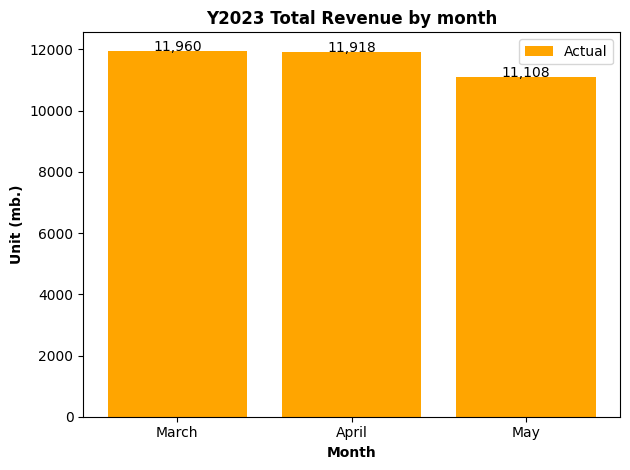

In [30]:
# plt.figure().set_figwidth(12)

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')    
plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue by month', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure().set_figwidth(12)

# plt.plot(x_axis, y_tgt, 'bo--', markeredgewidth=3, label='Target')
plt.plot(x_axis, y_tgt, marker='.', linestyle='dashed', markeredgewidth=3, label='Target', color='yellow')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i]+0.1, y_act[i]))
    # plt.annotate(str(format(y_tgt[i],',.0f')), xy=(x_axis[i]+0.1, y_tgt[i]))
plt.xticks(x_axis, x)
plt.xlabel('Month', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue : Monthly trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Weekly Performance

In [31]:
# Rawdata by week
df_rev_wk = df_rev_agg.groupby('TM_KEY_WK').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_wk['%ACHIEVE'] = (df_rev_wk['ACTUAL_SNAP'] / df_rev_wk['TARGET_SNAP']) * 100
df_rev_wk['ACTUAL_DIFF'] = df_rev_wk['ACTUAL_SNAP'].diff().fillna(0)
df_rev_wk['LAST_WK_ACTUAL'] = df_rev_wk['ACTUAL_SNAP'] - df_rev_wk['ACTUAL_DIFF']
# df_rev_wk['FF_NULL_TEST'] = df_rev_wk['ACTUAL_DIFF'].fillna(0)

# Aggregation
x = df_rev_wk['TM_KEY_WK'].apply(str).str[5:]
x_axis = np.arange(len(x))
y_act = df_rev_wk['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_wk['TARGET_SNAP'].round(2)
y_ach = df_rev_wk['%ACHIEVE'].round(2)
y_diff = df_rev_wk['ACTUAL_DIFF'].round(2)
y_last_act = df_rev_wk['LAST_WK_ACTUAL'].round(2)

# df_rev_wk.tail()

C:\Users\Narut4\AppData\Local\Temp\ipykernel_25752\2477799141.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rev_wk = df_rev_agg.groupby('TM_KEY_WK').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()


In [ ]:
plt.figure().set_figwidth(12)

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue by week', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

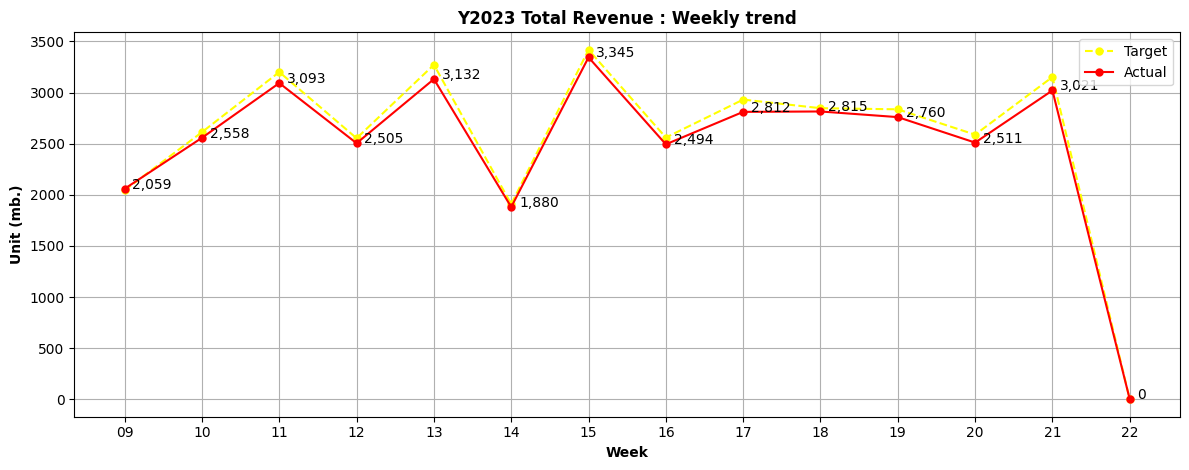

In [33]:
plt.figure().set_figwidth(12)

plt.plot(x_axis, y_tgt, marker='.', linestyle='dashed', markeredgewidth=3, label='Target', color='yellow')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i]+0.1, y_act[i]))
    # plt.annotate(str(format(y_tgt[i],',.0f')), xy=(x_axis[i]+0.1, y_tgt[i]))
    
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue : Weekly trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
plt.figure().set_figwidth(12)

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i]+0.1, y_ach[i]))
plt.xticks(x_axis, x)
plt.title(f'Y{curr_yr} Total Revenue : %Achieve & Different by week', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by week', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i]+0.1, y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Daily Performance : M2D

In [34]:
# Rawdata by day
df_rev_curr_mth = df_rev_agg[df_rev_agg['TM_KEY_MTH']==curr_mth].groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_curr_mth['KEY_DAY'] = df_rev_curr_mth['TM_KEY_DAY'].apply(str).str[6:]

df_rev_last_mth = df_rev_agg[df_rev_agg['TM_KEY_MTH']==last_mth].groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
df_rev_last_mth['KEY_DAY'] = df_rev_last_mth['TM_KEY_DAY'].apply(str).str[6:]
df_rev_last_mth.rename(columns=({'TM_KEY_DAY': 'LAST_MTH_TM_KEY_DAY', 'ACTUAL_SNAP': 'LAST_MTH_ACTUAL', 'TARGET_SNAP': 'LAST_MTH_TARGET'}), inplace=True)

df_rev_day = pd.merge(df_rev_curr_mth, df_rev_last_mth, on='KEY_DAY')
df_rev_day['%ACHIEVE'] = (df_rev_day['ACTUAL_SNAP'] / df_rev_day['TARGET_SNAP']) * 100
df_rev_day['ACTUAL_DIFF'] = df_rev_day['ACTUAL_SNAP'].diff().fillna(0)
df_rev_day['LAST_DAY_ACTUAL'] = df_rev_day['ACTUAL_SNAP'] - df_rev_day['ACTUAL_DIFF']
# df_rev_day['FF_NULL_TEST'] = df_rev_day['ACTUAL_DIFF'].fillna(0)

# Aggregation
x = df_rev_day['KEY_DAY']
x_axis = np.arange(len(x))
y_act = df_rev_day['ACTUAL_SNAP'].round(2)
y_tgt = df_rev_day['TARGET_SNAP'].round(2)
y_ach = df_rev_day['%ACHIEVE'].round(2)
y_diff = df_rev_day['ACTUAL_DIFF'].round(2)
y_last_day_act = df_rev_day['LAST_DAY_ACTUAL'].round(2)
y_last_mth_act = df_rev_day['LAST_MTH_ACTUAL'].round(2)

df_rev_day.tail(3)

C:\Users\Narut4\AppData\Local\Temp\ipykernel_25752\1924805165.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rev_curr_mth = df_rev_agg[df_rev_agg['TM_KEY_MTH']==curr_mth].groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()
C:\Users\Narut4\AppData\Local\Temp\ipykernel_25752\1924805165.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rev_last_mth = df_rev_agg[df_rev_agg['TM_KEY_MTH']==last_mth].groupby('TM_KEY_DAY').sum()[['ACTUAL_SNAP','TARGET_SNAP']].reset_index()


,TM_KEY_DAY,ACTUAL_SNAP,TARGET_SNAP,KEY_DAY,LAST_MTH_TM_KEY_DAY,LAST_MTH_ACTUAL,LAST_MTH_TARGET,%ACHIEVE,ACTUAL_DIFF,LAST_DAY_ACTUAL
27,20230528,708.624059,786.689125,28,20230428,809.216658,792.736971,90.076758,495.248952,213.375107
28,20230529,0.000000,0.000000,29,20230429,429.214762,435.403196,NaN,-708.624059,708.624059
29,20230530,0.000000,0.000000,30,20230430,184.391846,301.186894,NaN,0.000000,0.000000


In [35]:
df_rev_day.shape

(30, 10)

In [ ]:
# plt.figure().set_figwidth(12)
plt.figure(figsize=(18,6))

plt.bar(x_axis, y_act, label='Actual', color='orange')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i], y_act[i]), ha='center')
plt.xticks(x_axis, x)
plt.xlabel(curr_mth_desc, fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue by day', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

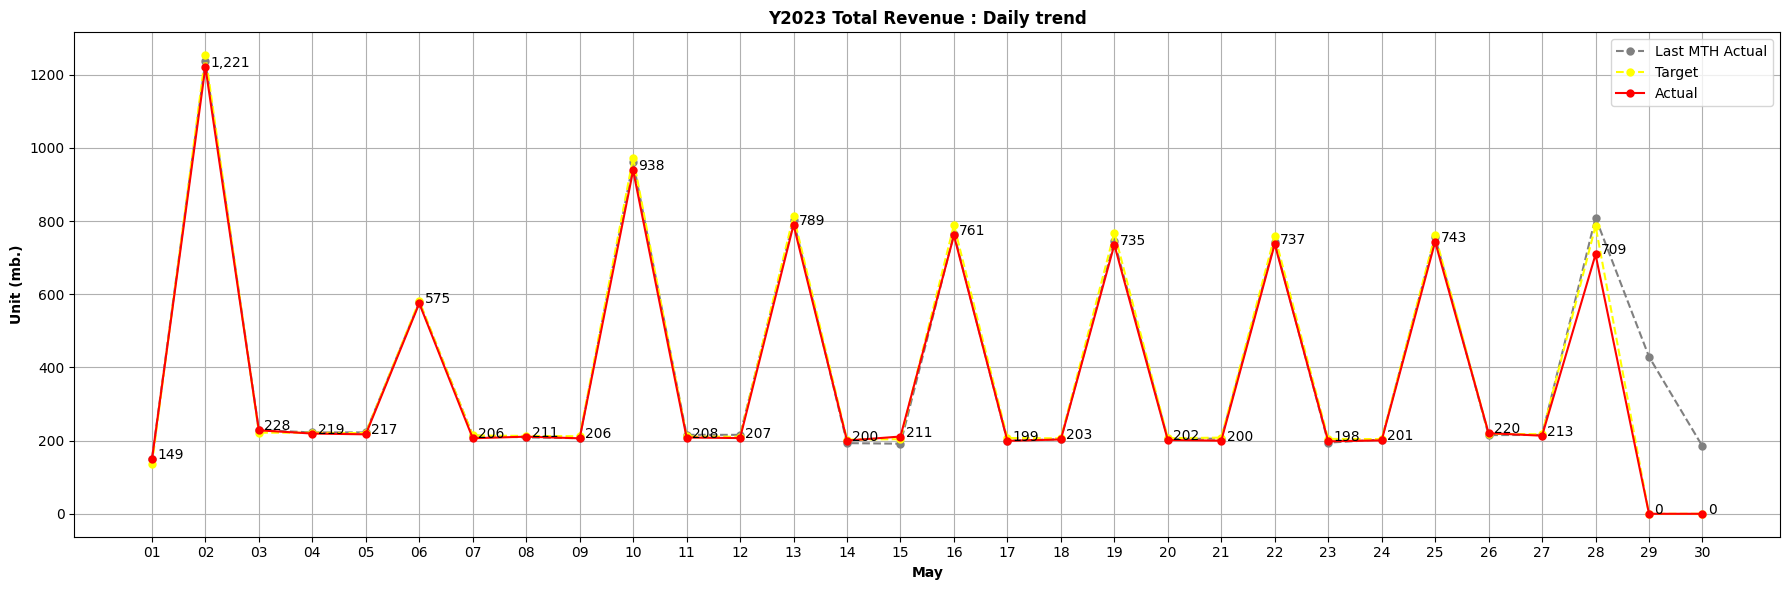

In [37]:
# plt.figure().set_figwidth(12)
plt.figure(figsize=(18,6))

# plt.plot(x_axis, y_tgt, 'bo--', markeredgewidth=3, label='Target')
plt.plot(x_axis, y_last_mth_act, marker='.', linestyle='dashed', markeredgewidth=3, label='Last MTH Actual', color='gray')
plt.plot(x_axis, y_tgt, marker='.', linestyle='dashed', markeredgewidth=3, label='Target', color='yellow')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
for i in x_axis:
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i]+0.1, y_act[i]))
    # plt.annotate(str(format(y_tgt[i],',.0f')), xy=(x_axis[i]+0.1, y_tgt[i]))
plt.xticks(x_axis, x)
plt.xlabel(curr_mth_desc, fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title(f'Y{curr_yr} Total Revenue : Daily trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

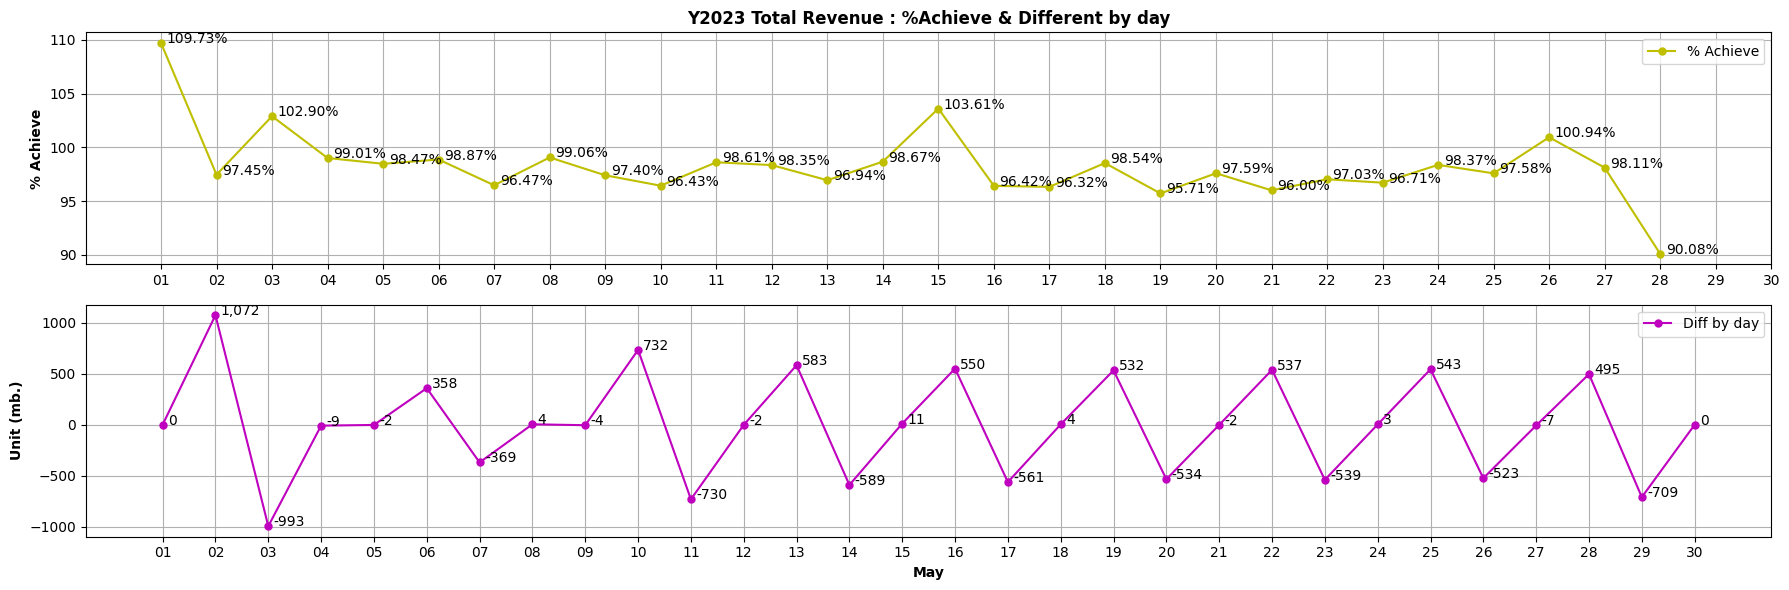

In [38]:
# plt.figure().set_figwidth(12)
plt.figure(figsize=(18,6))

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i]+0.1, y_ach[i]))
plt.xticks(x_axis, x)
plt.title(f'Y{curr_yr} Total Revenue : %Achieve & Different by day', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by day', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i]+0.1, y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel(curr_mth_desc, fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()